## 01. Analyse des données 

Ce notebook a pour objectif de réaliser une analyse exploratoire des données sélectionnées, ainsi que les premières étapes de traitement et de nettoyage des données.

### 1- Packages 

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

from matplotlib import pyplot as plt

### 2- Présentation des données 

Le jeu de données utilisé est eudirectlapse, issu de la collection CAS Datasets. Il contient des informations relatives au renouvellement annuel de contrats d’assurance automobile pour une année et un assureur non spécifiés, et comprend 23 060 polices.

In [3]:
DATA_FILE = Path("..") / "data" / "raw" / "eudirectlapse.csv"
df = pd.read_csv(DATA_FILE)

df.shape


(23060, 19)

La base de données contient 23 060 observations et 19 variables. 

In [4]:
df.head()

,lapse,polholder_age,polholder_BMCevol,polholder_diffdriver,polholder_gender,polholder_job,policy_age,policy_caruse,policy_nbcontract,prem_final,prem_freqperyear,prem_last,prem_market,prem_pure,vehicl_age,vehicl_agepurchase,vehicl_garage,vehicl_powerkw,vehicl_region
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23060 entries, 0 to 23059
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lapse                 23060 non-null  int64  
 1   polholder_age         23060 non-null  int64  
 2   polholder_BMCevol     23060 non-null  object 
 3   polholder_diffdriver  23060 non-null  object 
 4   polholder_gender      23060 non-null  object 
 5   polholder_job         23060 non-null  object 
 6   policy_age            23060 non-null  int64  
 7   policy_caruse         23060 non-null  object 
 8   policy_nbcontract     23060 non-null  int64  
 9   prem_final            23060 non-null  float64
 10  prem_freqperyear      23060 non-null  object 
 11  prem_last             23060 non-null  float64
 12  prem_market           23060 non-null  float64
 13  prem_pure             23060 non-null  float64
 14  vehicl_age            23060 non-null  int64  
 15  vehicl_agepurchase 

Dans ce jeu de données, on distingue une variable cible et un ensemble de variables explicatives. La variable lapse est une variable binaire indiquant la résiliation du contrat par le client.


Les variables explicatives décrivent les caractéristiques du souscripteur (âge, sexe, profession), du contrat (ancienneté, nombre de contrats, usage du véhicule), ainsi que des informations tarifaires (prime finale, prime précédente, prime technique, prime de marché). L’ensemble des variables explicatives comprend à la fois des variables numériques et des variables catégorielles.

### 3- Analyse 

In [5]:
# Pourcentage de NA par variable
na = (df.isna().mean() * 100).sort_values(ascending=False)
na[na > 0].head(30)


Series([], dtype: float64)

In [7]:
print("Doublons:", df.duplicated().sum())


Doublons: 0


In [9]:
df.isna().sum().sum()

np.int64(0)

Aucune valeur manquante n’est observée dans le jeu de données et il n'y a pas de doublons. Les données sont donc complètes et ne nécessitent pas de traitement d’imputation.

### 4 – Justification de l’utilisation de SMOTE


In [6]:
TARGET_COL = "lapse"  

In [7]:
y = df[TARGET_COL]
print(y.value_counts())
print("\nProportions:")
print(y.value_counts(normalize=True))

lapse
0    20106
1     2954
Name: count, dtype: int64

Proportions:
lapse
0    0.871899
1    0.128101
Name: proportion, dtype: float64


La distribution de la variable d'intérêt lapse est déséquilibré. Environ 12,8 % des contrats correspondent à une résiliation contre 87,2 % de contrats non résiliés. 

Dans un contexte assurantiel, où l’objectif est précisément d’identifier les contrats susceptibles de résilier, ce déséquilibre justifie l’étude de méthodes de rééquilibrage des classes telles que SMOTE.

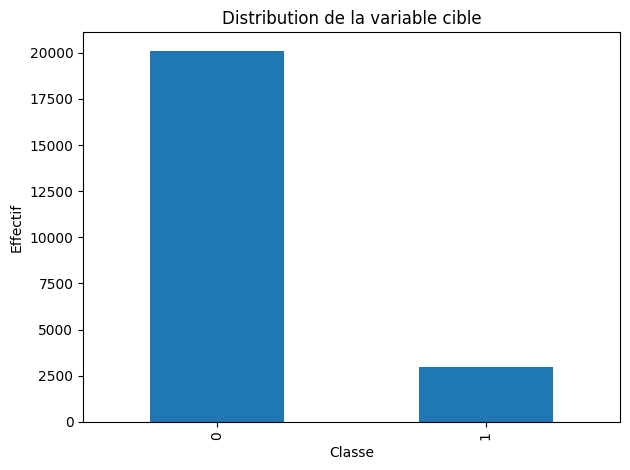

In [8]:
vc = y.value_counts()
plt.figure()
y.value_counts().plot(kind="bar")
plt.title("Distribution de la variable cible")
plt.xlabel("Classe")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

Dans ce notebook, nous avons pris en main le jeu de données à travers une analyse exploratoire. La variable cible présente un déséquilibre notable dans sa distribution, ce qui peut avoir un impact sur les performances des modèles prédictifs, ceux-ci ayant tendance à privilégier la classe majoritaire et à sous-détecter les résiliations, qui constituent pourtant l’événement d’intérêt dans notre contexte.

Par ailleurs, les variables explicatives sont composées à la fois de variables numériques et de variables catégorielles, ce qui nécessitera un traitement préalable des données avant la phase de modélisation.